In [6]:
# needed for xgb models since higher versions throw AttributeError

!pip install xgboost==1.4.2 --user

     ---------------------------------------- 97.8/97.8 MB 9.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from mapie.regression import MapieRegressor
import joblib
from pathlib import Path
from stc_unicef_cpi.models import prediction_intervals as pi
import matplotlib.pyplot as plt
import gc

random_state=0
np.random.seed(random_state)

In [4]:
import os
os.chdir('c:/Users/arpit/Desktop/dssg data/')

In [5]:
df = pd.read_csv('data/hexes_nigeria_res7_thres30.csv')
df.head(2)

,hex_code,name_commuting,win_population_commuting,win_roads_km_commuting,area_commuting,n_conflicts,geometry,length_km,area_km2,road_density,...,region,region2,latnum,longnum,dep_2_or_more_sev,dep_3_or_more_sev,dep_4_or_more_sev,hex_centroid,lat,long
0,609539916946210815,gombe,4.358806e+06,526223.973911,473573.430515,NaN,POLYGON ((12.870353829758475 13.34518407405799...,9.520626,5.373896,1.771643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,609550564925112319,lafia,4.358806e+06,76247.059487,39222.263991,NaN,"POLYGON ((8.499281557054683 8.559242937105092,...",2.819396,4.736557,0.595242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
target_dim = "deprived_sev"

In [14]:
pi.calibrate_prediction_intervals(
    pipeline_dir="pkl files",
    pipeline_name="nigeria-" + target_dim + "-normal-True-univ-nip-mean-standard-none",
    input_data=df, target_dim=target_dim,
    mapie_dir="mapie"
    )

In [16]:
# alpha=0.1 implies 10% out-of-interval predictions permissible
# ideal alpha in [0.1, 0.05, 0.01]
# should take ~ 30s to run for entire dataset

res = pi.predict_intervals(
    input_data=df,
    target_dim=target_dim, 
    mapie_dir="mapie", 
    alpha=0.1)#, save_dir="data")

In [18]:
res.head()

,lower_deprived_sev,prediction_deprived_sev,upper_deprived_sev,hex_code
0,0.682418,0.945978,1.000000,609539916946210815
1,0.102705,0.366266,0.629826,609550564925112319
2,0.384671,0.648232,0.911792,609547452399222783
3,0.463717,0.727277,0.990838,609549160739241983
4,0.659329,0.922890,1.000000,609534698141515775


In [17]:
gc.collect()

49

In [19]:
# avg width

(res["upper_"+target_dim]-res["lower_"+target_dim]).mean()

0.49208877647645166

In [20]:
# min & max widths

(res["upper_"+target_dim]-res["lower_"+target_dim]).min(), (res["upper_"+target_dim]-res["lower_"+target_dim]).max()

(0.061821430273678035, 0.5271207975304646)

(array([1.00000e+00, 4.00000e+00, 8.00000e+00, 6.30000e+01, 4.58000e+02,
        1.99200e+03, 9.39200e+03, 1.98020e+04, 2.62720e+04, 1.38051e+05]),
 array([0.06182143, 0.10835137, 0.1548813 , 0.20141124, 0.24794118,
        0.29447111, 0.34100105, 0.38753099, 0.43406092, 0.48059086,
        0.5271208 ]),
 <BarContainer object of 10 artists>)

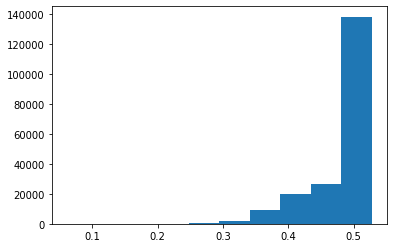

In [21]:
# plot widths

interval_widths = np.array(res["upper_"+target_dim]-res["lower_"+target_dim])
plt.hist(interval_widths)

In [22]:
gc.collect()

16